In [2]:
import pandas as pd
import os

import matplotlib.pyplot as plt

from dev_library import df_alignment

### Observations with children

In the later periods, there are no individuals with children. We first read in the original STATA file.

In [25]:
fname_data = "/home/peisenha/structExpectations/data-exchange-sciebo/soepcore_struct_prep.dta"
df_obs = df_alignment(pd.read_stata(fname_data, convert_categoricals=False))
df_obs.head()

Education_Level  Experience_Part_Time  Experience_Full_Time  \
Identifier Period                                                               
901        32                 Low                     2                    33   
           35                 Low                     2                    36   
           36                 Low                     2                    37   
           37                 Low                     2                    38   
           38                 Low                     2                    39   

                   Age_Youngest_Child  Number_of_Children  Partner_Indicator  \
Identifier Period                                                              
901        32                      -1                   0                  0   
           35                      -1                   0                  0   
           36                      -1                   0                  0   
           37                      -1                   0                  0   
           38                      -1                   0                  0   

                  Choice  Wage_Observed  
Identifier Period                        
901        32       Full      12.744263  
           35       Full      12.813683  
           36       Full      12.590151  
           37       Full      12.708170  
           38       Full      10.990616

Now I create an indicator variable for observation with children

In [26]:
df_obs["Child_present"] = (df_obs["Number_of_Children"] > 0)

We can then plot the share of individuals with children by period.

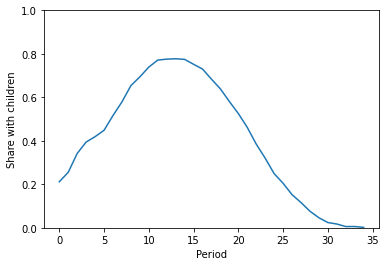

In [27]:
df_obs["Child_present"].groupby("Period").value_counts(normalize=True).loc[slice(None), True].plot(ylabel="Share with children", ylim=[0, 1]);

For the first 10 periods all lines up with a simulated dataset. However, there the share then stabilizes around 75\%.